Based on:

**BERT For Measuring Text Similarity**

https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1

In [1]:
! pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
sentences = [
    "Three years later, the coffin was still full of Jello.",
    "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
    "The person box was packed with jelly many dozens of months later.",
    "He found a leprechaun in his walnut shell.",
    "Undergraduate Topics in Computer Science (UTiCS) delivers high-quality instructional content for undergraduates studying in all areas of computing and information science.",
    "This chapter will familiarize you with the framework we shall use throughout the book to think about the design and analysis of algorithms.",
    "The U-shape observed in the test MSE curves (Figures 2.9–2.11) turns out to be the result of two competing properties of statistical learning methods.",
    "The best place to start is with the topic that is most relevant to your employees: the knowledge and skill that they need to do their job.",
    "What is the peak value of the distribution?",
    "JOHNSON, D.S, ARAGON, C.R., McGEOCH, L.A. and SCHEVON, C. (1987). Optimization by Simulated Annealing: an Experimental Evaluation. USA: AT&T Bell Laboratories.",
    "Each of these probabilities is between 0 and 1 inclusive, as it has to be to qualify as a probability.",
    "As you’ve seen, you can spot plenty of problems just by looking over the data summaries.",
    "Now let’s save the report with the name of Pubs Analysis Extended (save option is in the top left side of the report editor)."
]

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

In [16]:
sentences_embeddings = model.encode(sentences)

In [17]:
sentences_embeddings.shape

(13, 768)

In [18]:
sentences_embeddings[0]

array([ 7.44617209e-02,  8.63696814e-01,  1.79464266e-01, -2.03804210e-01,
        5.77560812e-02, -3.84834945e-01,  1.99586019e-01,  9.46924865e-01,
       -1.36267856e-01,  2.72824347e-01, -2.94658937e-03, -1.37115791e-01,
        5.36233902e-01,  6.68742478e-01,  3.10534060e-01,  1.85059994e-01,
       -7.95529932e-02,  2.02617705e-01,  4.98476207e-01, -1.06390738e+00,
       -1.44949615e-01, -4.65878069e-01, -4.84618694e-01, -9.44364429e-01,
        7.77254462e-01,  4.51875150e-01, -2.37356663e-01, -5.71306467e-01,
       -6.22071624e-01, -2.18596190e-01, -6.06815577e-01,  2.71750331e-01,
        2.25195274e-01,  2.20610991e-01, -2.13399921e-02,  4.28255051e-01,
       -6.90099776e-01, -2.77673095e-01, -9.42114070e-02,  2.20617905e-01,
        9.61427569e-01, -4.94797885e-01,  4.48158175e-01, -4.10281122e-01,
       -6.26279891e-01, -3.14264834e-01,  8.16002131e-01,  7.99038038e-02,
       -1.81297466e-01, -6.16720438e-01,  6.93271041e-01,  2.76767612e-01,
       -3.40561211e-01, -

In [19]:
len( sentences_embeddings[0] )

768

We can find the most similar sentence using:

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
cosine_similarity(
    [sentences_embeddings[0]],
    sentences_embeddings[1:]
)

array([[ 0.33088917,  0.72192585,  0.55483633,  0.17172733,  0.0654632 ,
         0.22390366, -0.04003043,  0.13377231,  0.22880363,  0.29557794,
         0.26946908,  0.27371725]], dtype=float32)

In [22]:
print( f'0: {sentences[0]}' )
print( f'2: {sentences[2]}' )

0: Three years later, the coffin was still full of Jello.
2: The person box was packed with jelly many dozens of months later.


K-Means

In [23]:
from sklearn.cluster import KMeans

In [24]:
clustersTotal = 5

In [25]:
kmeans = KMeans(
    n_clusters = clustersTotal, 
    random_state = 0)
kmeans.fit( sentences_embeddings )
kmeans

KMeans(n_clusters=5, random_state=0)

Evaluating visually the result.

In [27]:
from sklearn.manifold import TSNE
import seaborn as sns

In [30]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( sentences_embeddings )
tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 246 ms, sys: 6.38 ms, total: 252 ms
Wall time: 372 ms


In [31]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

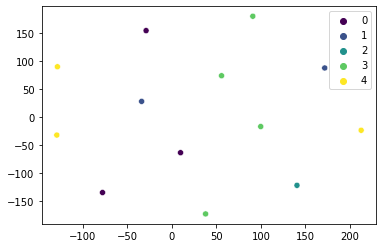

In [32]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')